# Language Classification

## NLP to classify Languages

Our goal is to create a model (Tensorflow) that can classify the language (English, Spanish, etc.) of a given sentence.

We will be mainly using Tensorflow framework along with Wikipedia, NumPy, Matplotlib, Pandas and Scikit-learn.

## Platform

I am running this notebook on Google Colaboratory platform.

Since it will be a simple model, so I am running this on CPU.

# Importing Libraries

In [1]:
# You may not have Wikipedia module. You can install it using this cell
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=d5fd0c7a34ae8919db8102730515735def32277de69f3afcc6b60778fdd2f010
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [1]:
# For files and directories
import pickle
import os

# For data generation
import wikipedia
import pandas as pd

# For basic operations
import numpy as np

# For image (confusion matrix) visualization
import matplotlib.pyplot as plt

# For model creation
import tensorflow as tf
from sklearn import utils, model_selection, preprocessing

# For model evaluation
from sklearn import metrics

# Creating Dataset

In this notebook, I will be classifying four languages, namely English, French, Spanish and Italian.



In [ ]:
# Get the codes of the languages
wikipedia.languages()

{'aa': 'Qafár af',
 'ab': 'Аҧсшәа',
 'abs': 'bahasa ambon',
 'ace': 'Acèh',
 'ady': 'адыгабзэ',
 'ady-cyrl': 'адыгабзэ',
 'aeb': 'تونسي/Tûnsî',
 'aeb-arab': 'تونسي',
 'aeb-latn': 'Tûnsî',
 'af': 'Afrikaans',
 'ak': 'Akan',
 'aln': 'Gegë',
 'als': 'Alemannisch',
 'alt': 'тÿштÿк алтай тил',
 'am': 'አማርኛ',
 'ami': 'Pangcah',
 'an': 'aragonés',
 'ang': 'Ænglisc',
 'anp': 'अङ्गिका',
 'ar': 'العربية',
 'arc': 'ܐܪܡܝܐ',
 'arn': 'mapudungun',
 'arq': 'جازايرية',
 'ary': 'الدارجة',
 'arz': 'مصرى',
 'as': 'অসমীয়া',
 'ase': 'American sign language',
 'ast': 'asturianu',
 'atj': 'Atikamekw',
 'av': 'авар',
 'avk': 'Kotava',
 'awa': 'अवधी',
 'ay': 'Aymar aru',
 'az': 'azərbaycanca',
 'azb': 'تۆرکجه',
 'ba': 'башҡортса',
 'ban': 'Basa Bali',
 'ban-bali': 'ᬩᬲᬩᬮᬶ',
 'bar': 'Boarisch',
 'bat-smg': 'žemaitėška',
 'bbc': 'Batak Toba',
 'bbc-latn': 'Batak Toba',
 'bcc': 'جهلسری بلوچی',
 'bcl': 'Bikol Central',
 'be': 'беларуская',
 'be-tarask': 'беларуская (тарашкевіца)\u200e',
 'be-x-old': 'беларуская (т

In [ ]:
# This function generates sentences on random topics using Wikipedia module in the given languages
def generate_data(languages_code, each_sample):
    X = []
    Y = []
    print('Generating data for the following languages: ', languages_code)

    for language in languages_code:
        # Set the language
        wikipedia.set_lang(language)

        # Generate the sentences
        for i in range(0, each_sample):
            try:
                # print(flag, language, each_sample, i, [wikipedia.page(wikipedia.random(1)).summary])
                X.append([wikipedia.summary(wikipedia.random(1), sentences=1)])

                if language == 'it':
                    Y.append('Italian')
                elif language == 'fr':
                    Y.append('French')
                elif language == 'en':
                    Y.append('English')
                elif language == 'es':
                    Y.append('Spanish')

            except wikipedia.exceptions.DisambiguationError as e:
                e = 'Ignore'

        print('Language ', wikipedia.languages()[language], ' (', language, ') completed.')

    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)
    X = np.append(X, Y, axis = 1)
    # print(X.shape)

    # Converting the data into a dataframe
    df = pd.DataFrame(X, columns = ['Sentences', 'Language'])

    # Saving this data into a '.csv' file in the current directory
    df.to_csv('all_data.csv', index = False)
    
    print('The data is generated.')

You may choose different and also many more languages as you wish to do.

Just get the code of the language from above and and change the 'languages_code' variable in below cell.

In [ ]:
languages_code = ['it', 'fr', 'en', 'es']

generate_data(languages_code, 1000)

Generating data for the following languages:  ['it', 'fr', 'en', 'es']
Language  italiano  ( it ) completed.
Language  français  ( fr ) completed.
Language  English  ( en ) completed.
Language  español  ( es ) completed.
The data is generated.


# Dataset Pre-processing

## Loading the dataset

In [3]:
# Load the created dataset
df = pd.read_csv('all_data.csv', encoding='latin-1')

# Print last 5 lines of dataset
df.tail()

,Sentence,Language
3628,El Premio internacional de novela Â«Emilio Ala...,Spanish
3629,La mujer mÃ¡s fea del mundo es una pelÃ­cula e...,Spanish
3630,"Bacuag, tambiÃ©n conocido como Bacnag, es un ...",Spanish
3631,Violent Femmes es una banda de rock alternativ...,Spanish
3632,"James Guthrie (Grenock, Escocia,10 de junio de...",Spanish


## Sentence Pre-processing

In [4]:
# Converting all letters to lowercase and then removing unwanted strings
df['Processed_Sentence'] = df['Sentence'].str.lower().replace('[^\w\s]','')
df['Processed_Sentence'] = df['Processed_Sentence'].fillna('fillna')

# Print few of the processed sentences
print('Sample processed sentences: \n', df['Processed_Sentence'][::500])

Sample processed sentences: 
 0       jean beauverie (fontaines-sur-saã´ne, 18 febbr...
500     questa voce raccoglie le informazioni riguarda...
1000    hiram bingham iv (17 juillet 1903-12 janvier 1...
1500    pollyanna (titre original : pollyanna) est un ...
2000    cryptothallus mirabilis is a species of liverw...
2500    a colostomy is an opening (stoma) in the large...
3000    paullinia brenesii, es una especie de planta t...
3500    las islas salomã³n estuvieron representadas en...
Name: Processed_Sentence, dtype: object


Now we will tokenize the words using 'Tokenizer' from Tensorflow module.

In [5]:
# Choose the top 5000 words from the vocabulary
top_k = 5000

# Create a 'Toknizer' object
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k, oov_token = "<unk>")
# Fit the tokenizer on processed sentences
tokenizer.fit_on_texts(list(df['Processed_Sentence']))

vocab_size = len(tokenizer.word_index) + 1
print('Total vocab size: ', vocab_size)

Total vocab size:  49314


Now, we will pad (post-padding) all the sentences till the given maximum length.

In [6]:
# Choose the maximum length of sentence to keep
max_length = 500

# Get all tokenized sentences
all_sentences = tokenizer.texts_to_sequences(df['Processed_Sentence'])
# Pad the tokenized sentences
all_sentences = tf.keras.preprocessing.sequence.pad_sequences(all_sentences, padding='post', maxlen = max_length)

print('Shape of sentences data: ', all_sentences.shape)

Shape of sentences data:  (3633, 500)


## Labels Pre-processing

In [7]:
# Get the labels from the dataset
Y = df['Language']

print('Total dataset: ', len(Y))

Total dataset:  3633


Now we will encode our labels (English, Italian, ...) into numeric data (0, 1, ...) using 'LabelEncoder' from Scikit-learn module.

In [8]:
# Create encoder object
encoder = preprocessing.LabelEncoder()
# Fit the encoder on our labels
encoder.fit(Y)

# Get the encoded labels
Y = encoder.transform(Y)

print('Sample labels: \n', Y[::500])

Sample labels: 
 [2 2 1 1 0 0 3 3]


Now, we will one-hot encode our labels using Tensorflow module.

In [9]:
# Get the number of unique labels
num_classes = len(np.unique(Y))

# Convert the labels into one-hot vector
Y = tf.keras.utils.to_categorical(Y, num_classes = num_classes)
print('Sample labels: \n', Y[::500])

print('\nShape of labels data: ', Y.shape)

Sample labels: 
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

Shape of labels data:  (3633, 4)


In [10]:
# Check the labels mapping
print('Labels mapping is as follows: \n')
for i in range(num_classes):
    print(encoder.classes_[i], ' >> ', i)

Labels mapping is as follows: 

English  >>  0
French  >>  1
Italian  >>  2
Spanish  >>  3


## Splitting the dataset

We will split the dataset into training and testing set using Scikit-learn.

Validation set will be created while training the model.

In [11]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(all_sentences, Y, test_size = 0.1)

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (3269, 500)
Y_train shape:  (3269, 4)
X_test shape:  (364, 500)
Y_test shape:  (364, 4)


# Model

## Model Configurations

Setting the hyper-parameters

In [12]:
# Feel free to change these parameters according to your system's configuration
batch_size = 128
embedding_dim = 128

# Setting this to a higher value (considering the data) as we will be using Early-Stopping method
max_epochs = 20

# The following parameters are same as used before
vocab_size = vocab_size
num_classes = num_classes

In [13]:
# This is used to plot performance graphs of our models
def performance(histories):
    plt.figure(figsize = (15, 10))
    # Plot Loss
    plt.subplot(2,2,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories.history['loss'], color = 'blue', label = 'train')
    plt.plot(histories.history['val_loss'], color = 'red', label = 'test')
    # Plot Accuracy
    plt.subplot(2,2,2)
    plt.title('Classification Accuracy')
    plt.plot(histories.history['accuracy'], color = 'blue', label = 'train')
    plt.plot(histories.history['val_accuracy'], color = 'red', label = 'test')
    # Show the plot
    plt.show()

## Create model

In [14]:
# Creating a model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = max_length))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          6312192   
_________________________________________________________________
flatten (Flatten)            (None, 64000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16384256  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1

## Training of model

We will create 3 callbacks:


1.   **Model Checkpoint**
    -    To save the best model.
2.   **Early Stopping**
    -    To stop the training when validation accuracy starts increasing.
3.   **Reduce Learning rate on Plateau**
    -    To decrease the learning rate when validation loss stops decreasing.



In [15]:
callbacks = [tf.keras.callbacks.ModelCheckpoint('model.h5', save_best_only = True),
             tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.00001, patience = 5,
                                              verbose = 1, mode = 'auto'),
             tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2,
                                                  verbose = 1, mode = 'auto', min_lr = 0.000001)]

Start the training.

Epoch 1/20
23/23 [==============================] - 11s 477ms/step - loss: 1.4880 - accuracy: 0.2991 - val_loss: 1.2641 - val_accuracy: 0.5505
Epoch 2/20
23/23 [==============================] - 11s 468ms/step - loss: 0.8240 - accuracy: 0.7420 - val_loss: 0.2083 - val_accuracy: 0.9755
Epoch 3/20
23/23 [==============================] - 11s 466ms/step - loss: 0.0887 - accuracy: 0.9806 - val_loss: 0.0181 - val_accuracy: 0.9969
Epoch 4/20
23/23 [==============================] - 11s 465ms/step - loss: 0.0145 - accuracy: 0.9969 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 5/20
23/23 [==============================] - 13s 582ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0109 - val_accuracy: 0.9939
Epoch 6/20
23/23 [==============================] - 11s 465ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0074 - val_accuracy: 0.9969
Epoch 7/20
23/23 [==============================] - 10s 440ms/step - loss: 0.0118 - accuracy: 0.9973 - val_loss: 0.0078 - val_accuracy: 0.9969

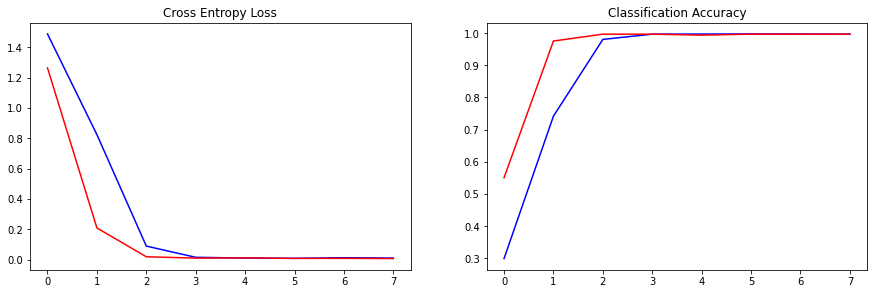

In [16]:
history = model.fit(np.array(X_train), np.array(Y_train),
                    batch_size = batch_size,
                    validation_split = 0.1,
                    callbacks = callbacks,
                    epochs = max_epochs)

performance(history)

We have got very high training and validation accuracies. That's great.

We also don't have any overfitting. The high validation accuracy compared to training accuracy in the starting epochs is due to Dropout layers.


## Testing of model

### Evaluation

In [17]:
# Let us evaluate the model on test set
model.evaluate(np.array(X_test), np.array(Y_test))

12/12 [==============================] - 0s 25ms/step - loss: 0.0025 - accuracy: 1.0000


[0.0025378093123435974, 1.0]

Seems like we have a perfect model.

Let us evaluate using other parameters too.

### Classification report

In [19]:
# Predict and Evaluate
Y_predict = tf.keras.utils.to_categorical(np.argmax(model.predict(X_test), axis = 1), num_classes = num_classes).astype('int32')
accuracy = np.sum(Y_predict == Y_test) / np.size(Y_predict)
print("Test accuracy = {}".format(accuracy), '\n\n')

# Classification report
print(metrics.classification_report(Y_test, Y_predict, target_names = encoder.classes_, digits = 4))


Test accuracy = 1.0 


              precision    recall  f1-score   support

     English     1.0000    1.0000    1.0000        63
      French     1.0000    1.0000    1.0000        92
     Italian     1.0000    1.0000    1.0000       115
     Spanish     1.0000    1.0000    1.0000        94

   micro avg     1.0000    1.0000    1.0000       364
   macro avg     1.0000    1.0000    1.0000       364
weighted avg     1.0000    1.0000    1.0000       364
 samples avg     1.0000    1.0000    1.0000       364



Plotting a confusion matrix of evaluation.

### Confusion matrix

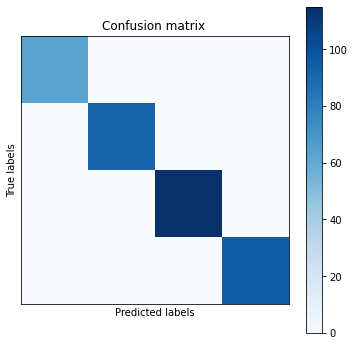

Confusion matrix values: 



array([[ 63,   0,   0,   0],
       [  0,  92,   0,   0],
       [  0,   0, 115,   0],
       [  0,   0,   0,  94]])

In [20]:
# Plot confusion matrix
cm = metrics.confusion_matrix(Y_predict.argmax(axis = 1), Y_test.argmax(axis = 1))
plt.figure(figsize = (6, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

print('Confusion matrix values: \n')
cm

# Saving the model

In [21]:
# We will save the tokenizer so that we do not have to generate it again 
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

# We will also save other necessary parameters
all_param = [max_length, encoder.classes_]
with open('all_param.pkl', 'wb') as p:
    pickle.dump(all_param, p, protocol = pickle.HIGHEST_PROTOCOL)

In [22]:
# We have already saved our model during the callbacks
# Otherwise, we could also save it using this code
model.save('model.h5')

# Predict new sentences

Let us see how our model works on real worls new random examples.

In [53]:
# Run this cell to avoid printing Tensorflow warning of tr-tracing same graph multiple times
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [54]:
# This function is used to predict our model on given sentences
def predict_new(sentences):

    # Loading the text Tokenizer
    with open('tokenizer.pkl', 'rb') as handle:
        my_tokenizer = pickle.load(handle)
    
    # Loading other necessary parameters
    with open('all_param.pkl', 'rb') as p:
        my_all_param = pickle.load(p)
    my_max_length, my_classes = my_all_param

    # Loading the model
    my_model = tf.keras.models.load_model('model.h5')

    # Pre-processing the sentences
    my_df = pd.DataFrame(sentences, columns = ['Sentence'])
    my_df['Processed_Sentence'] = my_df['Sentence'].str.lower().replace('[^\w\s]','')
    my_df['Processed_Sentence'] = my_df['Processed_Sentence'].fillna('fillna')

    # Tokenizing and passing the sentences
    my_sentences = my_tokenizer.texts_to_sequences(my_df['Processed_Sentence'])
    my_sentences = tf.keras.preprocessing.sequence.pad_sequences(my_sentences, padding='post', maxlen = my_max_length)

    # Getting the predictions
    my_prediction = my_model.predict(my_sentences)
    # Getting the classes of predictions
    my_pred_class = my_classes[np.argmax(my_prediction, axis = 1)]

    return my_pred_class, my_prediction

In [55]:
# I have taken a text in Englis and converted it into other languages using Google Translator
s = [['TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks.'],                               # English
     ['TensorFlow è una libreria software gratuita e open source per il flusso di dati e la programmazione differenziabili in una vasta gamma di attività.'],      # Italian
     ['TensorFlow es una biblioteca de software gratuita y de código abierto para el flujo de datos y la programación diferenciable en una variedad de tareas.'],  # Spanish
     ['TensorFlow est une bibliothèque logicielle gratuite et open-source pour le flux de données et la programmation différenciable sur une gamme de tâches.']    # French
     ]

# Get the predictions and classes
s_class, s_pred = predict_new(s)

# Print the predictions and classes
for i in range(len(s)):
    print('The sentence \'', s[i], '\'\nis in \'', s_class[i], '\' language with ',
          np.max(s_pred[i])*100, '% confidence.\n')

The sentence ' ['TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks.'] '
is in ' English ' language with  99.84663724899292 % confidence.

The sentence ' ['TensorFlow è una libreria software gratuita e open source per il flusso di dati e la programmazione differenziabili in una vasta gamma di attività.'] '
is in ' Italian ' language with  99.95958209037781 % confidence.

The sentence ' ['TensorFlow es una biblioteca de software gratuita y de código abierto para el flujo de datos y la programación diferenciable en una variedad de tareas.'] '
is in ' Spanish ' language with  99.99784231185913 % confidence.

The sentence ' ['TensorFlow est une bibliothèque logicielle gratuite et open-source pour le flux de données et la programmation différenciable sur une gamme de tâches.'] '
is in ' French ' language with  99.9789297580719 % confidence.



Our model is working great and giving correct prediction with a very high confidence.

# Thank You